In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(font_scale=1.7, style='whitegrid') 

In [103]:
#sample = np.loadtxt("Code/8.1/sampling.dat")
#energy = np.loadtxt("Code/8.1/ene.dat")
params1 = np.loadtxt("Code/8.2/params1.dat")
params2 = np.loadtxt("Code/8.2/params2.dat")
params3 = np.loadtxt("Code/8.2/params3.dat")
params4 = np.loadtxt("Code/8.2/params4.dat")

len(params)

3000

In [58]:
mu = 0.8
sigma = 0.62

def Vpot(x):
    return (x**2-2.5)*x**2

def Analitic_psi(x,mu,sigma):  #è il modulo quadro della psi di trial normalizzata
    normalization = 2. * sigma * np.sqrt(np.pi) * ( 1. + np.exp(-mu**2/sigma**2) )
    return ((np.exp(-(x-mu)**2/(2*sigma**2))+np.exp(-(x+mu)**2/(2*sigma**2)))**2)/normalization

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

scale = 0.3


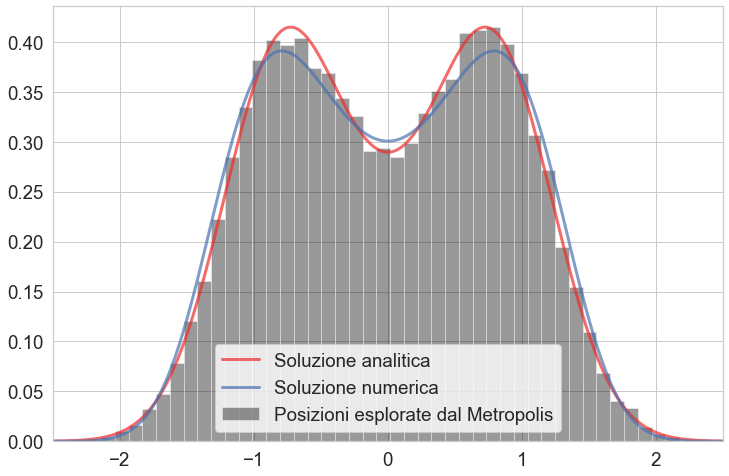

In [66]:
plt.figure(figsize=(12,8))
plt.hist(sample, bins=50, density=True, alpha=0.4, color='black', label='Posizioni esplorate dal Metropolis')
plt.plot(x, Analitic_psi(x, mu, sigma), color='#EE2C2C', linewidth=3, alpha=0.7, label='Soluzione analitica')
plt.plot(x,(psi[0])**2, label = 'Soluzione numerica', linewidth=3, alpha=0.7)
plt.xlim(-2.5,2.5)
plt.legend()
plt.show()

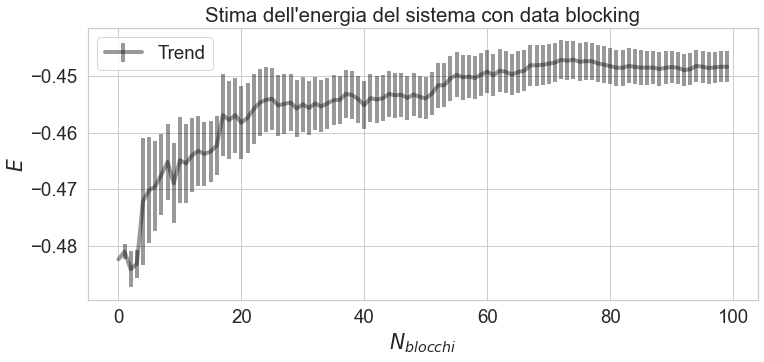

In [55]:
x = np.arange(100)

plt.figure(figsize=(12,5))
plt.title("Stima dell'energia del sistema con data blocking")
plt.errorbar(x, energy.T[2], yerr=energy.T[3], color='black', alpha=0.4, label='Trend', linewidth=4)
#plt.hlines(e,0,101, color='#EE2C2C', linestyle='-', label="Valore teorico", linewidth=3, alpha=0.8)
plt.ylabel("$E$")
plt.xlabel("$N_{blocchi}$")
plt.legend()
plt.show()

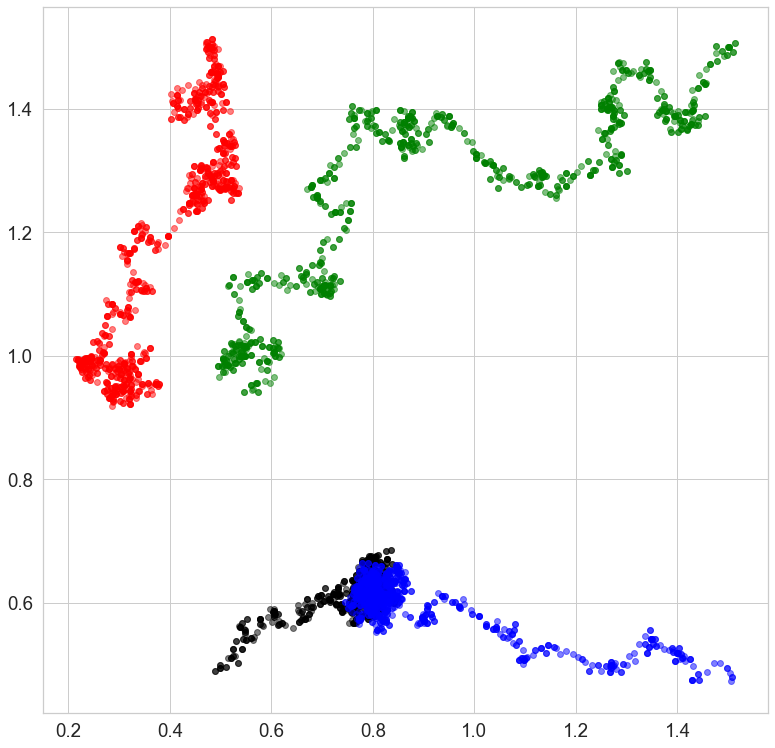

In [104]:
plt.figure(figsize=(13,13))

    
plt.scatter(params1.T[0], params1.T[1], color='black', s=35, alpha=0.5)
plt.scatter(params2.T[0], params2.T[1], color='red', s=35, alpha=0.5)
plt.scatter(params3.T[0], params3.T[1], color='blue', s=35, alpha=0.5)
plt.scatter(params4.T[0], params4.T[1], color='green', s=35, alpha=0.5)